In [1]:
import pandas as pd
from sklearn import datasets

iris = datasets.load_iris()
print(iris.target_names)


species = [iris.target_names[x] for x in iris.target]
iris = pd.DataFrame(iris['data'], columns = ['Sepal_Length', 'Sepal_Width', 'Petal_Length', 'Petal_Width'])
iris['Species'] = species
print(iris)


['setosa' 'versicolor' 'virginica']
     Sepal_Length  Sepal_Width  Petal_Length  Petal_Width    Species
0             5.1          3.5           1.4          0.2     setosa
1             4.9          3.0           1.4          0.2     setosa
2             4.7          3.2           1.3          0.2     setosa
3             4.6          3.1           1.5          0.2     setosa
4             5.0          3.6           1.4          0.2     setosa
5             5.4          3.9           1.7          0.4     setosa
6             4.6          3.4           1.4          0.3     setosa
7             5.0          3.4           1.5          0.2     setosa
8             4.4          2.9           1.4          0.2     setosa
9             4.9          3.1           1.5          0.1     setosa
10            5.4          3.7           1.5          0.2     setosa
11            4.8          3.4           1.6          0.2     setosa
12            4.8          3.0           1.4          0.1     setos

In [2]:
iris.dtypes

Sepal_Length    float64
Sepal_Width     float64
Petal_Length    float64
Petal_Width     float64
Species          object
dtype: object

In [3]:
iris['count'] = 1
iris[['Species', 'count']].groupby('Species').count()

count
Species          
setosa         50
versicolor     50
virginica      50

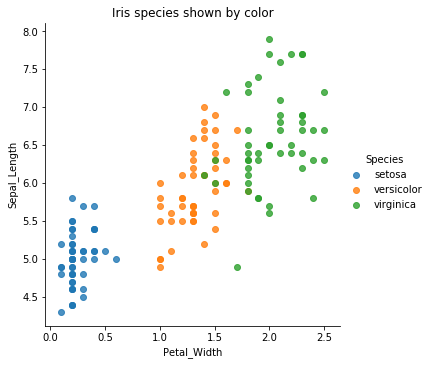

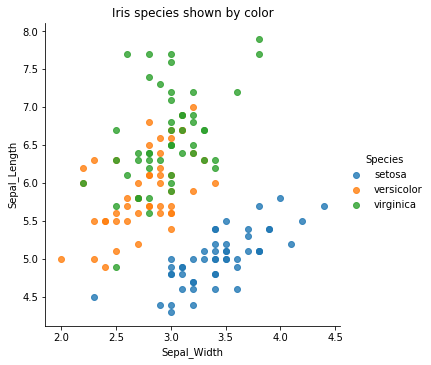

In [4]:
%matplotlib inline
def plot_iris(iris, col1, col2):
    import seaborn as sns
    import matplotlib.pyplot as plt
    sns.lmplot(x = col1, y = col2, 
               data = iris, 
               hue = "Species", 
               fit_reg = False)
    plt.xlabel(col1)
    plt.ylabel(col2)
    plt.title('Iris species shown by color')
    plt.show()
plot_iris(iris, 'Petal_Width', 'Sepal_Length')
plot_iris(iris, 'Sepal_Width', 'Sepal_Length')

In [5]:
from sklearn.preprocessing import scale
import pandas as pd
num_cols = ['Sepal_Length', 'Sepal_Width', 'Petal_Length', 'Petal_Width']
iris_scaled = scale(iris[num_cols])
iris_scaled = pd.DataFrame(iris_scaled, columns = num_cols)
print(iris_scaled)
print(iris_scaled.describe().round(3))

     Sepal_Length  Sepal_Width  Petal_Length  Petal_Width
0       -0.900681     1.019004     -1.340227    -1.315444
1       -1.143017    -0.131979     -1.340227    -1.315444
2       -1.385353     0.328414     -1.397064    -1.315444
3       -1.506521     0.098217     -1.283389    -1.315444
4       -1.021849     1.249201     -1.340227    -1.315444
5       -0.537178     1.939791     -1.169714    -1.052180
6       -1.506521     0.788808     -1.340227    -1.183812
7       -1.021849     0.788808     -1.283389    -1.315444
8       -1.748856    -0.362176     -1.340227    -1.315444
9       -1.143017     0.098217     -1.283389    -1.447076
10      -0.537178     1.479398     -1.283389    -1.315444
11      -1.264185     0.788808     -1.226552    -1.315444
12      -1.264185    -0.131979     -1.340227    -1.447076
13      -1.870024    -0.131979     -1.510739    -1.447076
14      -0.052506     2.169988     -1.453901    -1.315444
15      -0.173674     3.090775     -1.283389    -1.052180
16      -0.537

In [6]:
levels = {'setosa':0, 'versicolor':1, 'virginica':2}
iris_scaled['Species'] = [levels[x] for x in iris['Species']]
iris_scaled.head()


Sepal_Length  Sepal_Width  Petal_Length  Petal_Width  Species
0     -0.900681     1.019004     -1.340227    -1.315444        0
1     -1.143017    -0.131979     -1.340227    -1.315444        0
2     -1.385353     0.328414     -1.397064    -1.315444        0
3     -1.506521     0.098217     -1.283389    -1.315444        0
4     -1.021849     1.249201     -1.340227    -1.315444        0

In [7]:

from sklearn.model_selection import train_test_split
import numpy as np
np.random.seed(3456)
iris_split = train_test_split(np.asmatrix(iris_scaled), test_size = 75)
iris_train_features = iris_split[0][:, :4]
iris_train_labels = np.ravel(iris_split[0][:, 4])
iris_test_features = iris_split[1][:, :4]
iris_test_labels = np.ravel(iris_split[1][:, 4])
print(iris_train_features.shape)
print(iris_train_labels.shape)
print(iris_test_features.shape)
print(iris_test_labels.shape)

(75, 4)
(75,)
(75, 4)
(75,)


In [8]:

from sklearn.neighbors import KNeighborsClassifier
KNN_mod = KNeighborsClassifier(n_neighbors = 3)
KNN_mod.fit(iris_train_features, iris_train_labels)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=3, p=2,
           weights='uniform')

In [9]:
iris_test = pd.DataFrame(iris_test_features, columns = num_cols)
print(iris_test)
iris_test['predicted'] = KNN_mod.predict(iris_test_features)
print(iris_test)
iris_test['correct'] = [1 if x == z else 0 for x, z in zip(iris_test['predicted'], iris_test_labels)]
print(iris_test)
print(sum(iris_test['correct']))
accuracy = 100.0 * float(sum(iris_test['correct'])) / float(iris_test.shape[0])
print(accuracy)

    Sepal_Length  Sepal_Width  Petal_Length  Petal_Width
0      -0.052506    -0.822570      0.080709     0.000878
1       0.189830    -0.822570      0.762758     0.527406
2      -1.264185     0.788808     -1.056039    -1.315444
3      -0.537178     1.939791     -1.397064    -1.052180
4       0.553333    -0.362176      1.046945     0.790671
5      -0.294842    -0.822570      0.251221     0.132510
6       0.553333     0.558611      1.274295     1.712096
7       2.492019     1.709595      1.501645     1.053935
8      -1.143017    -1.282963      0.421734     0.659038
9      -0.537178     1.939791     -1.169714    -1.052180
10     -0.779513     1.019004     -1.283389    -1.315444
11      0.432165    -0.592373      0.592246     0.790671
12     -1.143017    -1.513160     -0.260315    -0.262387
13     -1.143017     0.098217     -1.283389    -1.447076
14      0.310998    -0.592373      0.535409     0.000878
15     -0.900681    -1.282963     -0.430828    -0.130755
16     -0.294842    -0.592373  

'Done'

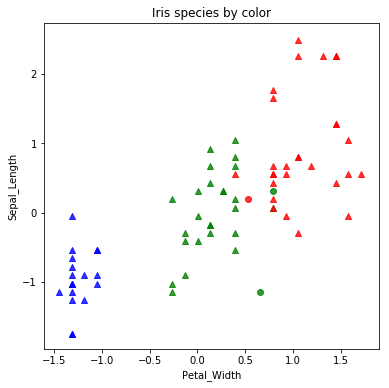

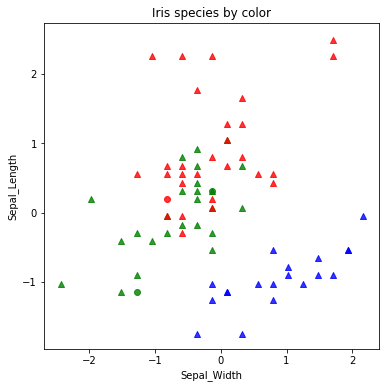

In [10]:
levels = {0:'setosa', 1:'versicolor', 2:'virginica'}
iris_test['Species'] = [levels[x] for x in iris_test['predicted']]
markers = {1:'^', 0:'o'}
colors = {'setosa':'blue', 'versicolor':'green', 'virginica':'red'}
def plot_shapes(df, col1,col2,  markers, colors):
    import matplotlib.pyplot as plt
    import seaborn as sns
    ax = plt.figure(figsize=(6, 6)).gca() 
    for m in markers: 
        for c in colors: 
            df_temp = df[(df['correct'] == m)  & (df['Species'] == c)]
            sns.regplot(x = col1, y = col2, 
                        data = df_temp,  
                        fit_reg = False, 
                        scatter_kws={'color': colors[c]},
                        marker = markers[m],
                        ax = ax)
    plt.xlabel(col1)
    plt.ylabel(col2)
    plt.title('Iris species by color')
    return 'Done'
plot_shapes(iris_test, 'Petal_Width', 'Sepal_Length', markers, colors)
plot_shapes(iris_test, 'Sepal_Width', 'Sepal_Length', markers, colors)